#### 1.	Chose a suitable representation of the maze nodes using the available Python data structures. You must define all attributes representing the information you need 

#### 6. Build the representation of the maze by creating start node, end node and red nodes according to the diagram on Fig. 1.




In [2]:
maze = [[0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0]]

start = (0, 0)
end   = (4, 5)

#### 2.	Define the success criteria for reaching the end node.
#### 3.	Define the path function which accumulates the past nodes into a path
#### 5.	Define the algorithm for heuristic search considering the success criteria, the permitted moves in each node and the cost

In [3]:
class Node():

    def __init__(self, parent=None, position=None):
        self.parent, self.position = parent, position
        self.g, self.h, self.f = 0, 0, 0
         



def Search(maze, start, end, h):

    # Create start and end node
    start_node      = Node(None, start)
    end_node        = Node(None, end)
    start_node.f    = 0       
    end_node.f      = 0       
    open_list       = []      # Initialize both open 
    closed_list     = []      # and closed list

    
    open_list.append(start_node)  # Add the start node

    # Loop until you find the end
    while len(open_list) > 0: 

        # Get the current node # 
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):  #
            if item.f < current_node.f:  # we are not using this for now
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)
        
        # Found the goal
        if current_node.position == end_node.position:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path
            
        
        # Generate neighbors
        neighbors = []
        for direction in [(0, -1), (0, 1), (-1, 0), (1, 0)]: # Adjacent squares # , (-1, -1), (-1, 1), (1, -1), (1, 1) for diagonal

            # Get node position
            node_position = (current_node.position[0] + direction[0], current_node.position[1] + direction[1])

            # Make sure within range # if one them is true ,go back to the for with the next element
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[0]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            neighbors.append(new_node)

        # Loop through neighbors
        for new_neighbor in neighbors:

            new_neighbor.g, new_neighbor.h, new_neighbor.f = h(new_neighbor, current_node, end_node)

            open_list.append(new_neighbor)

           # print("")
           # print("Current Node: ", current_node.position, "Neighbor: ", new_neighbor.position, "f: ", new_neighbor.f, "g: ", new_neighbor.g, "h: ", new_neighbor.h)
           # print("Number of visited nodes: ", len(closed_list))
           # for i in range(len(maze)):
           #     for j in range(len(maze[0])):
           #         if (i, j) == current_node.position:
           #             print("C", end=" ")
           #         elif (i, j) == new_neighbor.position:
           #             print("N", end=" ")
           #         elif (i, j) in [x.position for x in open_list]:
           #             print("O", end=" ")
           #        else:
           #             print(maze[i][j], end=" ")
           #     print()



#### 4.	Define suitable heuristic function to estimate the cost on each path 

 ####	Implement additional algorithm for solving the problem using different technique Constraint Propagation, Dejkstra
####	Implement the A* with different heuristic function	



### Dijkstra
##### Similar algorithm to Astar but unlike Astar, Dijkstra's algorithm uses a heuristic identically equal to 0.

##### We just need to assign a value to each node, for that we will use the distance g and the cost from the star node to that node, that cost is already entered into the calculation of g.

### CSP
##### This is an adaptation to the Knapsack problem. We assign a value to each node, taking into account the final node, in our case the estimated distance from the final node, from how we defined the problem, to find the path with the minimum value.

##### So it is enough just to set the function g to zero.

### Generic

##### I wanted to try a genetic algorithm eliminating the total cost to see the automatic path it does.

In [4]:
def Astar(new_neighbor, current_node, end_node):
    Manhattan  = abs(new_neighbor.position[0] - end_node.position[0])  + abs(new_neighbor.position[1] - end_node.position[1])
    Euclidean  = (((new_neighbor.position[0] - end_node.position[0]) ** 2) + ((new_neighbor.position[1] - end_node.position[1]) ** 2))**0.5
    Minkowsky  = (abs((new_neighbor.position[0] - end_node.position[0]) ** 3) + abs((new_neighbor.position[1] - end_node.position[1]) ** 3))**(1/3)
    Chebyshev  = max(new_neighbor.position[0] - end_node.position[0]  , new_neighbor.position[1] - end_node.position[1])
    new_neighbor.g = current_node.g + 1
    new_neighbor.h = Euclidean
    new_neighbor.f = new_neighbor.g + new_neighbor.h
    return new_neighbor.g, new_neighbor.h, new_neighbor.f

def Dijkstra(new_neighbor, current_node, end_node):
    new_neighbor.g = current_node.g + 1
    new_neighbor.h = 0
    new_neighbor.f = new_neighbor.g + new_neighbor.h
    return new_neighbor.g, new_neighbor.h, new_neighbor.f

def CSP(new_neighbor, current_node, end_node):
    Manhattan  = abs(new_neighbor.position[0] - end_node.position[0])  + abs(new_neighbor.position[1] - end_node.position[1])
    Euclidean  = (((new_neighbor.position[0] - end_node.position[0]) ** 2) + ((new_neighbor.position[1] - end_node.position[1]) ** 2))**0.5
    Minkowsky  = (abs((new_neighbor.position[0] - end_node.position[0]) ** 3) + abs((new_neighbor.position[1] - end_node.position[1]) ** 3))**(1/3)
    Chebyshev  = max(new_neighbor.position[0] - end_node.position[0]  , new_neighbor.position[1] - end_node.position[1])
    new_neighbor.g = 0
    new_neighbor.h = Euclidean
    new_neighbor.f = new_neighbor.g + new_neighbor.h
    return new_neighbor.g, new_neighbor.h, new_neighbor.f

def Generic(new_neighbor, current_node, end_node):
    new_neighbor.g = 0
    new_neighbor.h = 0
    new_neighbor.f = new_neighbor.g + new_neighbor.h
    return new_neighbor.g, new_neighbor.h, new_neighbor.f



#### 7.	Run the program and output the optimal path found by the algorithm

In [5]:
path = Search(maze, start, end, h = Astar)

In [6]:
print("The shortest path is: ", path)


The shortest path is:  [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5)]


####	Design a board to represent the maze in 2D plain (in text or graphics mode)	            
####	Trace the attempted nodes during the search process				            
####	Visualize the search paths during the execution 


[2, 1, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 2]
[0, 1, 0, 1, 0, 2]
[0, 1, 0, 0, 1, 2]
[0, 0, 0, 0, 1, 2]


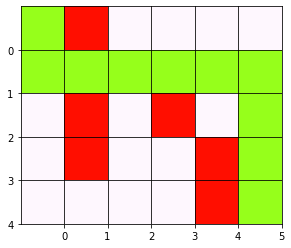

In [7]:
for i in range(len(maze)):
    for j in range(len(maze[i])):
        if (i, j) in path:
            maze[i][j]=2
    print(maze[i])
    

import numpy as np
from matplotlib import pyplot as plt

dct = {1: 7.6, 0: 10., 2: 5.}
n = [[dct[i] for i in j] for j in maze]
#print(n)

plt.imshow(n, cmap='gist_ncar', vmin=1, vmax=10)
plt.grid(color='black')
ax = plt.gca()
ax.set_xticks(np.arange(0, 6, 1)+0.5)
ax.set_yticks(np.arange(0, 5, 1)+0.5)
ax.set_xticklabels(np.arange(0, 6, 1))
ax.set_yticklabels(np.arange(0, 5, 1))

plt.show()

In [8]:
#import time

#t = time.time()
#print(round(time.time() - t, 2), f'seconds\n\n{path}')

0.0 seconds

[(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5)]


###### They would all look similar because in fact they give me the optimal path, but the number of nodes visiting (hence the execution time) is not the same. Using A* as a heuristic with Manathan, it is the most effective because it visits only 22 nodes, with the Euclidean it visits 32 nodes. Dijkstra visits 1276 nodes, CSP visits only 9 before arriving at the end node.